In [1]:
using PyPlot

/Users/kolbylyn/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
alpha(r::Float64,k::Float64,l::Float64) = acos((r^2.0 + k^2.0 - l^2.0)/(2.0*k*r))    

alpha (generic function with 1 method)

In [3]:
beta(r::Float64,k::Float64,l::Float64) = acos((r^2.0 + l^2.0 - k^2.0)/(2.0*l*r))  

beta (generic function with 1 method)

In [4]:
function r(tau::Array{Float64},b::Float64,k::Float64,l::Float64,T::Float64)
    v = 2.0*sqrt((k+l)^2.0-b^2.0)/T
    return sqrt(b^2.0 .+ (v.*tau).^2.0)
end

r (generic function with 1 method)

In [5]:
tau(t::Array{Float64},P::Float64,t_n::Float64) = mod(t.-t_n+(P/2),P)-(P/2.0)

tau (generic function with 1 method)

In [6]:
function overlap(rs::Array{Float64},k::Float64,l::Float64)
    result = Float64[]
    for r in rs
        if r >= l+k
            push!(result,0.0)
        elseif r <= l-k
            push!(result,pi*k^2.0)
        else
            push!(result,(k^2.0)*(alpha(r,k,l)-cos(alpha(r,k,l))*sin(alpha(r,k,l)))+(l^2.0)*(beta(r,k,l)-cos(beta(r,k,l))*sin(beta(r,k,l))))
        end
    end
    return result
end

overlap (generic function with 1 method)

In [7]:
function transit(ts::Array{Float64},F_s::Float64,k::Float64,l::Float64,P::Float64,T::Float64,t_n::Float64,b::Float64)
    taus = tau(ts,P,t_n)
    rs = r(taus,b,k,l,T)
    overlaps = overlap(rs,k,l)
    return F_s*(1.0.-overlaps./(pi*l^2.0))
end

transit (generic function with 1 method)

In [8]:
function occultation(ts::Array{Float64},F_p::Float64,k::Float64,l::Float64,P::Float64,T::Float64,t_n::Float64,b::Float64)
    taus = tau(ts-(P/2.0),P,t_n)
    rs = r(taus,b,k,l,T)
    overlaps = overlap(rs,k,l)
    return F_p*(1.0.-overlaps./(pi*k^2.0))
end

occultation (generic function with 1 method)

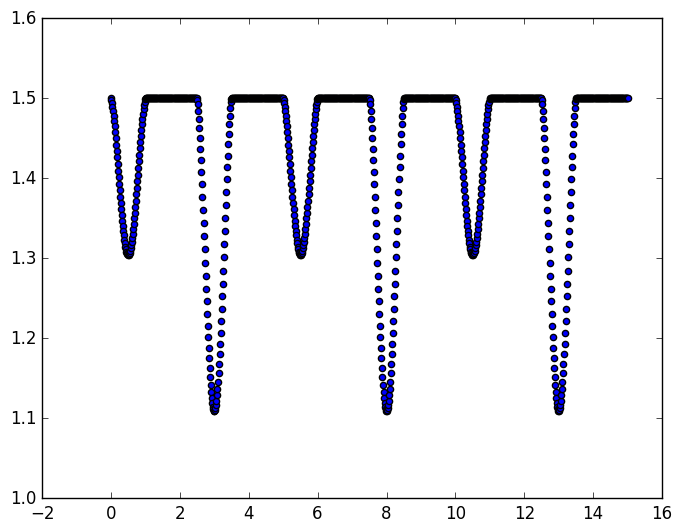

In [9]:
## test transit codes
ts = collect(linspace(0,15,1000))
F_s = 1.
F_p = 0.5
k = 1.
l = 1.
P = 5.
T = 1.
t_n = 8.0
b = 1.
scatter(ts,transit(ts,F_s,k,l,P,T,t_n,b)+occultation(ts,F_p,k,l,P,T,t_n,b));

In [10]:
function phase_folder(x,P)
    #phase-folds data to period P
    phase = mod(x, P)/P;
    return phase
end


function plot_transit(x_data,y_data,fit)
    #Outputs a phase folded normalized plot of light curve (points) with best fit (line)
    
    # need to get period and other params from fit object
    P = fit[whatever parameter it may be]
    
    x_fit = fit[]  #... maybe x_fit = x_data will be the same if we are just fitting to x_data
    y_fit = fit[]
    phase_fit = phase_folder(x_fit, P)
    plot(phase_fit,y_fit)
    
    phase_data = phase_folder(x_data,P)    
    scatter(phase_data, y_data, alpha=0.2)
end


function density(fit)
    # given the fit, calculate the density of the star in solar density units
    # from Seager & Mallen-Ornelas 2003
    
    # need some code here to take the fit and divy up into parameters like period, etc.
    P = fit[]
    T = fit[]
    flux = fit[]
    dflux = maximum(1-flux)
    
    Msun = 1.9891e33  # g
    Rsun = 6.955e10   # cm

    # factor to put it in units of sun
    factor = (365.25^2.0/215.^3.0)*(Msun / Rsun^3.0)
    rho = (factor/P^2.0) * ((1+sqrt(dflux))^2.0 -(b^2.0*(1-(sinpi(T/P))^2.0))/(sinpi(T/P)^2.0))^1.5
    
    #something is weird here ^ when T is really small but can't test it til we have fit params.
    
end

density (generic function with 1 method)

In [11]:
#Read in data, separate into arrays
data = readdlm("mystery_planet2.txt",Float64) 
time = data[:,1]
flux0 = data[:,2]
flux = flux0/maximum(flux0)
flux_err = data[:,3] ;

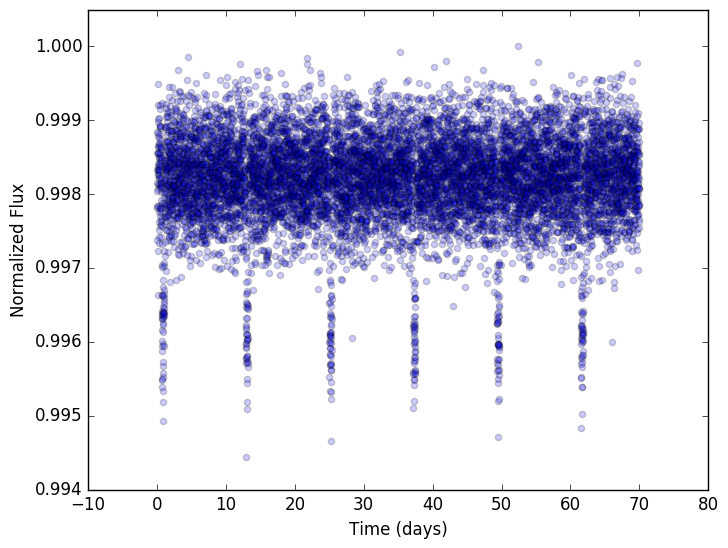

In [12]:
scatter(time, flux, alpha=0.2)
xlabel("Time (days)")
ylabel("Normalized Flux")
ylim(0.994,1.0005);

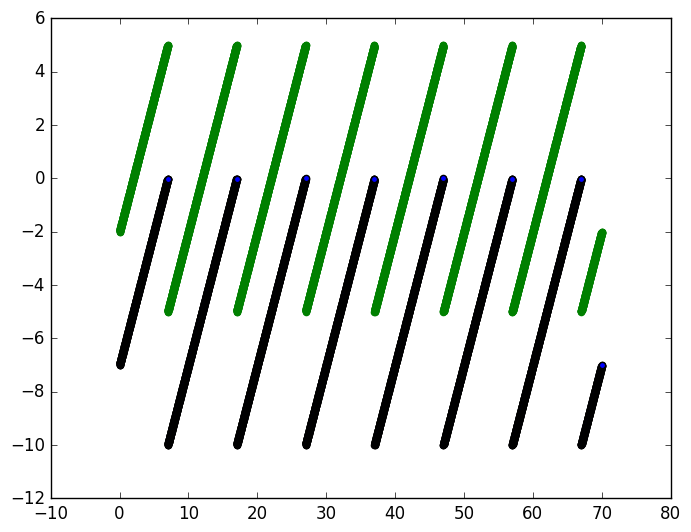

In [13]:
scatter(time,tau(time,10.0,2.0)-(10.0/2.0))
scatter(time,tau(time,10.0,2.0),color="green");

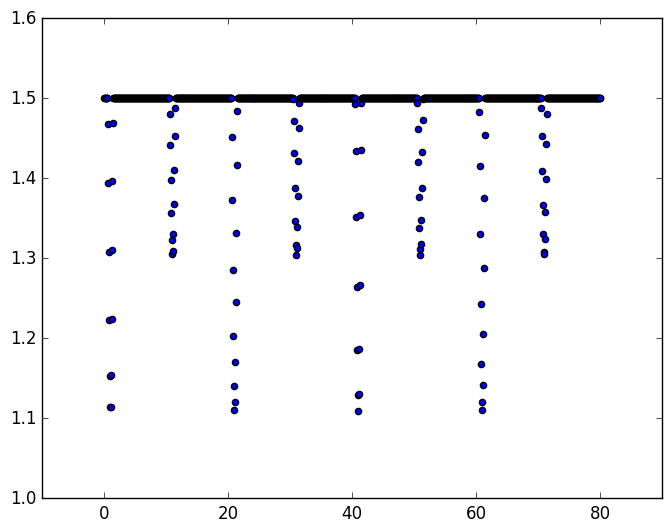

In [52]:
## test transit codes
ts = collect(linspace(0,80,1000))
F_s = 1.
F_p = 0.5
k = 1.
l = 1.
P = 20.
T = 1.
t_n = 1.0
b = 1.
fs = transit(ts,F_s,k,l,P,T,t_n,b)
scatter(ts,transit(ts,F_s,k,l,P,T,t_n,b)+occultation(ts,F_p,k,l,P,T,t_n,b));

In [54]:
# code to determine first guess at period. should search within 1 day period around P_guess
# uses flux with ONLY transit (not second occult bc you probably wouldn't see that anyway)

arr = hcat(ts,fs)
lowest = sortrows(arr, by=x->(x[2]))
mins = sort(unique(round(lowest[1:50,1])))
P_guess = maximum(mins[2:findlast(mins)]-mins[1:findlast(mins)-1])

20.0

In [56]:
# works well with our mystery planet data!
arr = hcat(time,flux)
lowest = sortrows(arr, by=x->(x[2]))
mins = sort(unique(round(lowest[1:50,1])))
P_guess = maximum(mins[2:findlast(mins)]-mins[1:findlast(mins)-1])

12.0